In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import torch

In [20]:
is_kaggle = "KAGGLE_KERNEL_RUN_TYPE" in os.environ
path = Path('../input/visual-taxonomy') if is_kaggle else Path('data')

if is_kaggle:
    utils_path = Path('../input/attribute-extraction-meesho')
    from shutil import copyfile
    copyfile(src = utils_path/'data_utils.py', dst = "../working/data_utils.py")

In [22]:
from data_utils import *

In [3]:
cat_info = pd.read_parquet(path/'category_attributes.parquet')
df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')

In [4]:
cat_info

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [5]:
print(df.shape)
df.sample(5)

(70213, 13)


,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
14906,15071,Sarees,10,NaN,woven design,big border,green,daily,NaN,NaN,NaN,NaN,no
61140,61306,Women Tops & Tunics,10,peach,regular,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
52064,52230,Women Tops & Tunics,10,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60098,60264,Women Tops & Tunics,10,NaN,fitted,regular,sweetheart neck,casual,NaN,NaN,NaN,regular sleeves,knitted
43564,43730,Women Tshirts,8,default,regular,regular,printed,typography,short sleeves,regular sleeves,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70213 entries, 0 to 70212
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        70213 non-null  int64 
 1   Category  70213 non-null  object
 2   len       70213 non-null  int64 
 3   attr_1    51867 non-null  object
 4   attr_2    55192 non-null  object
 5   attr_3    54698 non-null  object
 6   attr_4    59888 non-null  object
 7   attr_5    56493 non-null  object
 8   attr_6    38116 non-null  object
 9   attr_7    41415 non-null  object
 10  attr_8    37474 non-null  object
 11  attr_9    33565 non-null  object
 12  attr_10   24999 non-null  object
dtypes: int64(2), object(11)
memory usage: 7.0+ MB


In [7]:
pd.DataFrame({'df':df.groupby('Category')['id'].nunique(),'test':test_df.groupby('Category')['id'].nunique()})

,df,test
Category,,
Kurtis,6822,2460
Men Tshirts,7267,3787
Sarees,18346,7102
Women Tops & Tunics,19004,6925
Women Tshirts,18774,9931


In [8]:
df.drop(columns=['id','len']).groupby('Category').agg('nunique')

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
Category,,,,,,,,,,
Kurtis,13,2,2,2,2,2,2,3,2,0
Men Tshirts,4,2,2,3,2,0,0,0,0,0
Sarees,4,6,3,8,4,3,4,5,9,2
Women Tops & Tunics,12,4,2,7,2,3,6,4,4,6
Women Tshirts,7,3,3,3,6,3,2,2,0,0


In [9]:
cat_info.set_index('Category', inplace=True)

In [10]:
def plot_counts(category):
    attributes = cat_info.loc[category, 'Attribute_list']
    ncols = 3
    nrows = len(attributes)//ncols+1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows*4))
    axes = axes.flatten()
    fig.suptitle(category, fontsize=16)
    
    for i, (attr, ax) in enumerate(zip(attributes, axes)):
        df_category = df[df.Category == category]
        df_category[f'attr_{i+1}'].value_counts().plot(kind='barh', ax=ax)
        ax.set_title(attr)
        ax.set_ylabel('')
        
    for j in range(i + 1, len(axes)): fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=5.0)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # rect ensures the suptitle is not cut off
    plt.show()

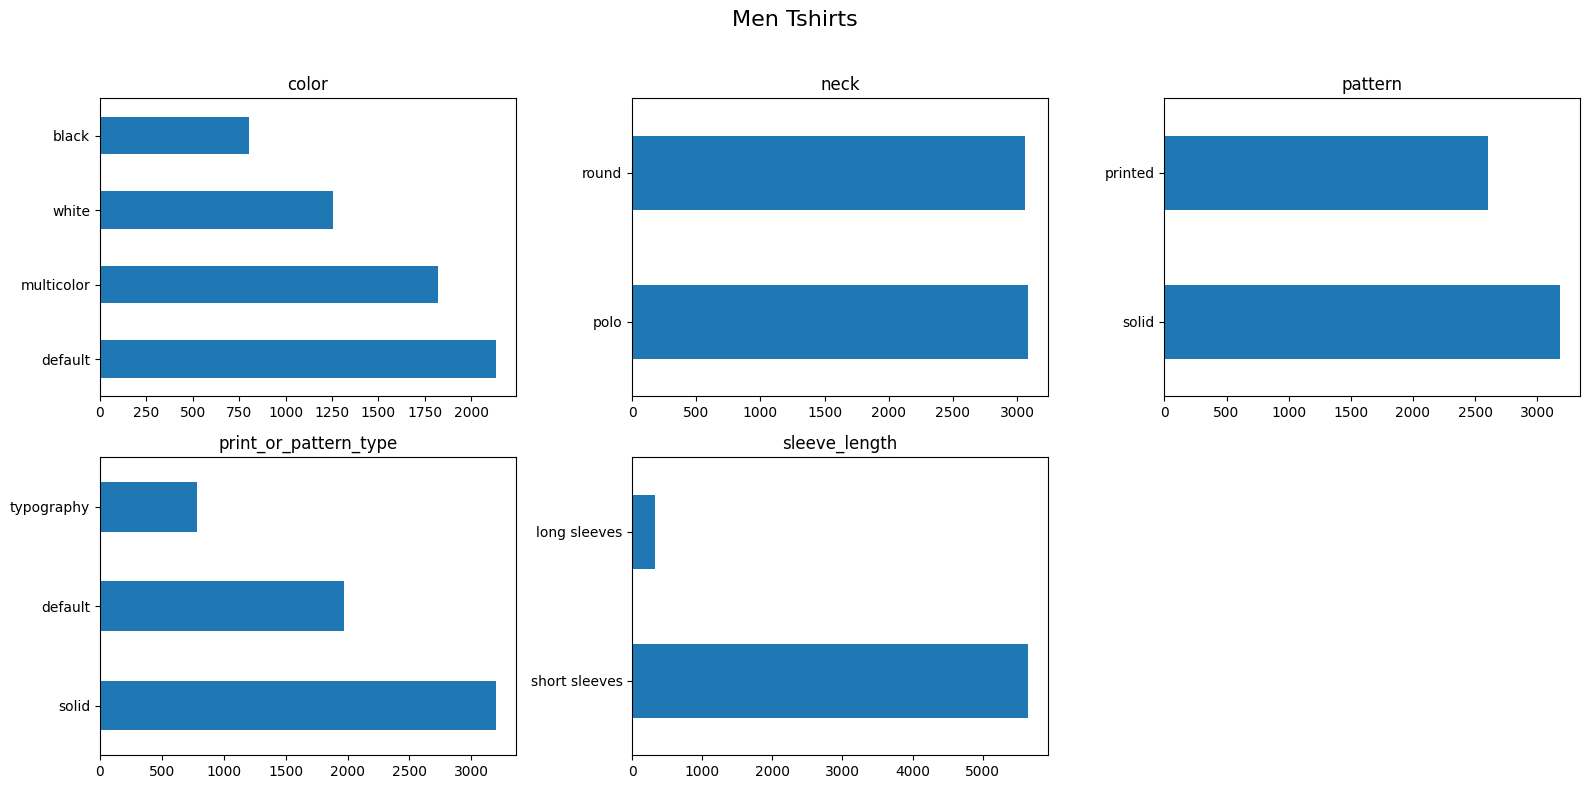

In [11]:
plot_counts('Men Tshirts')

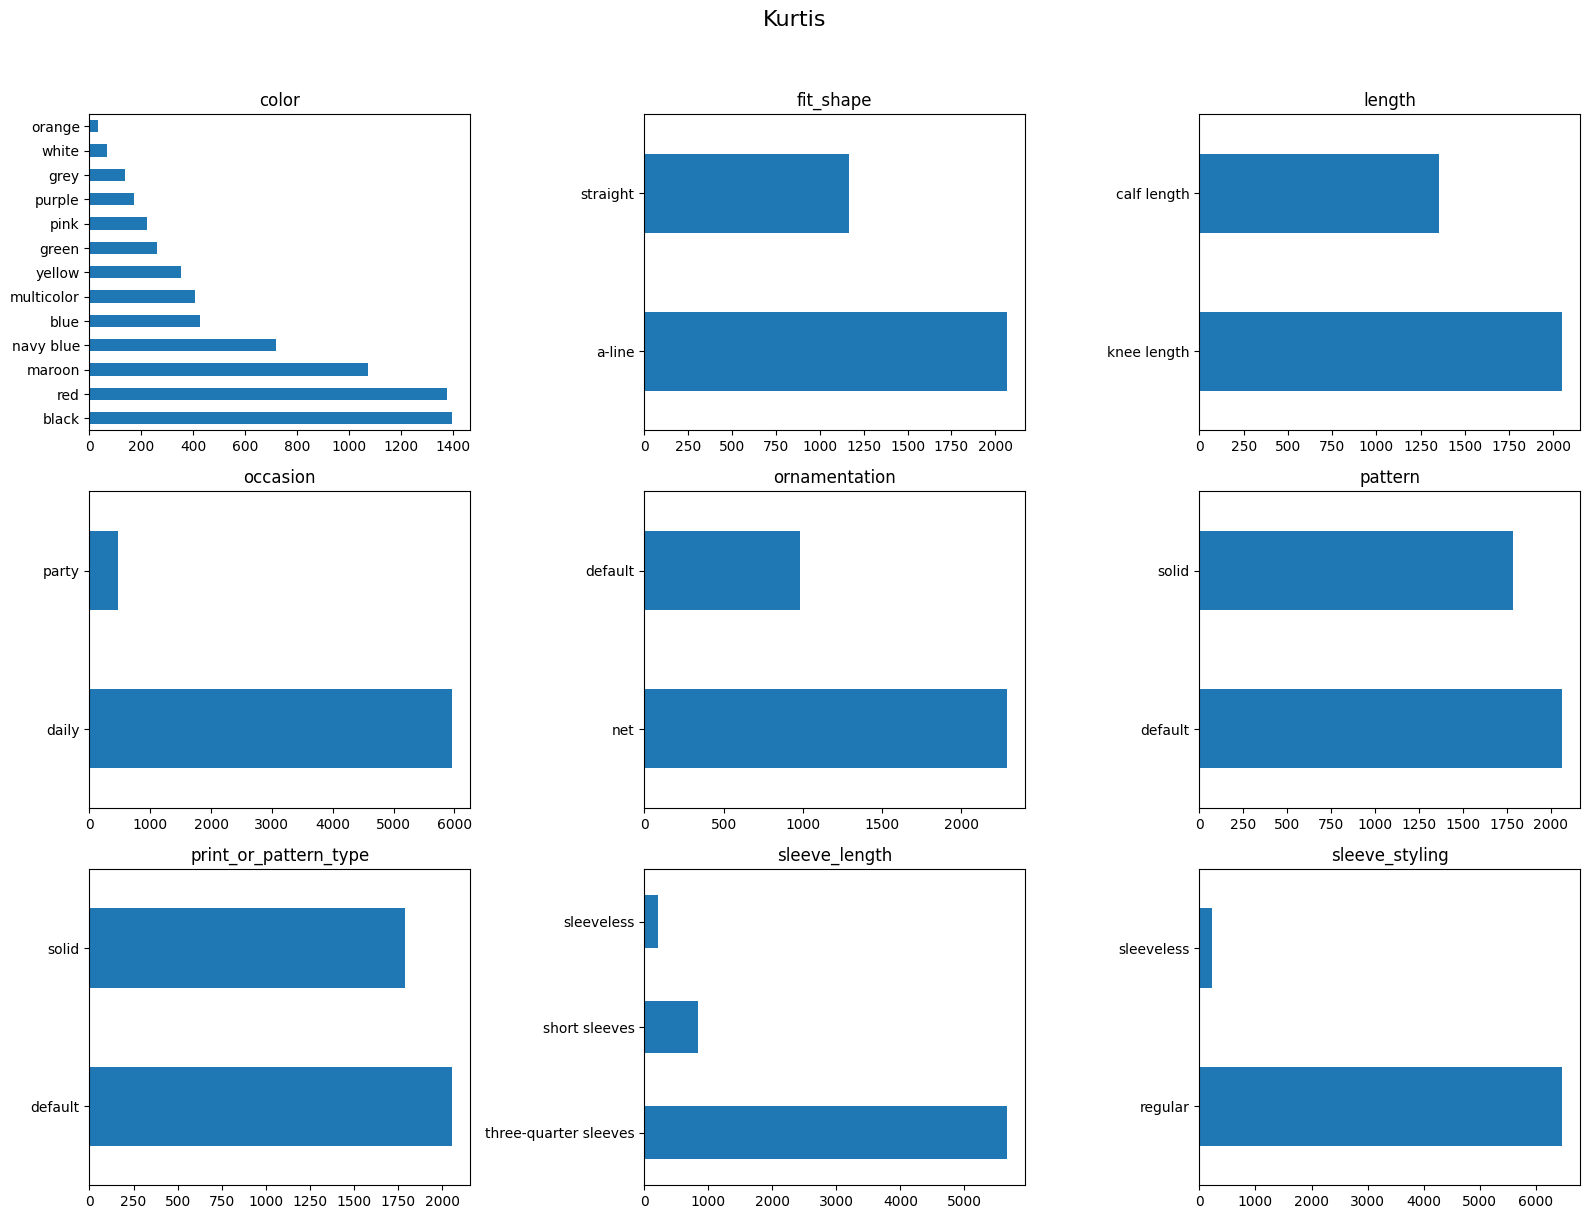

In [12]:
plot_counts('Kurtis')

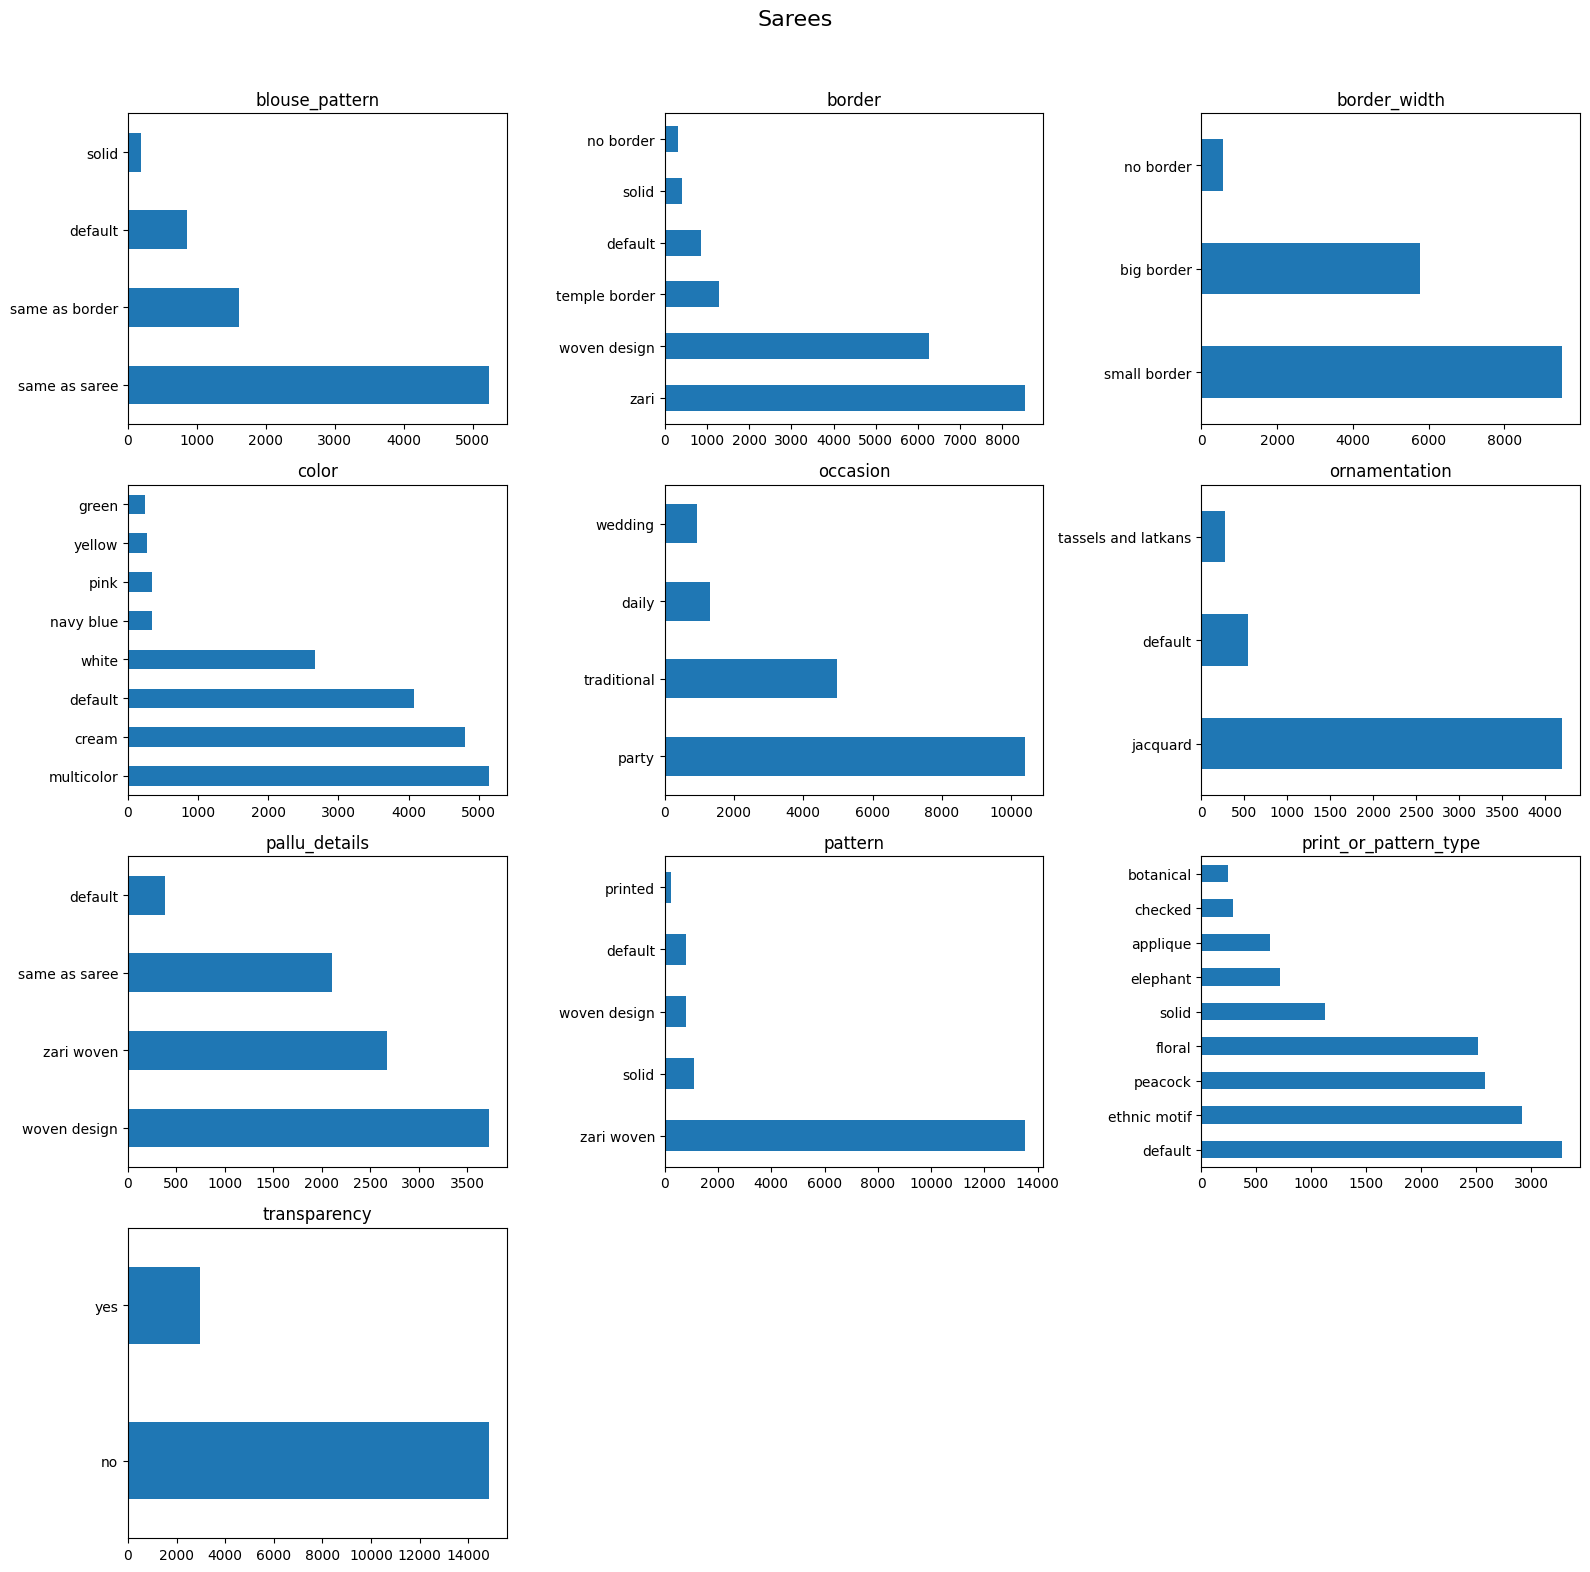

In [13]:
plot_counts('Sarees')

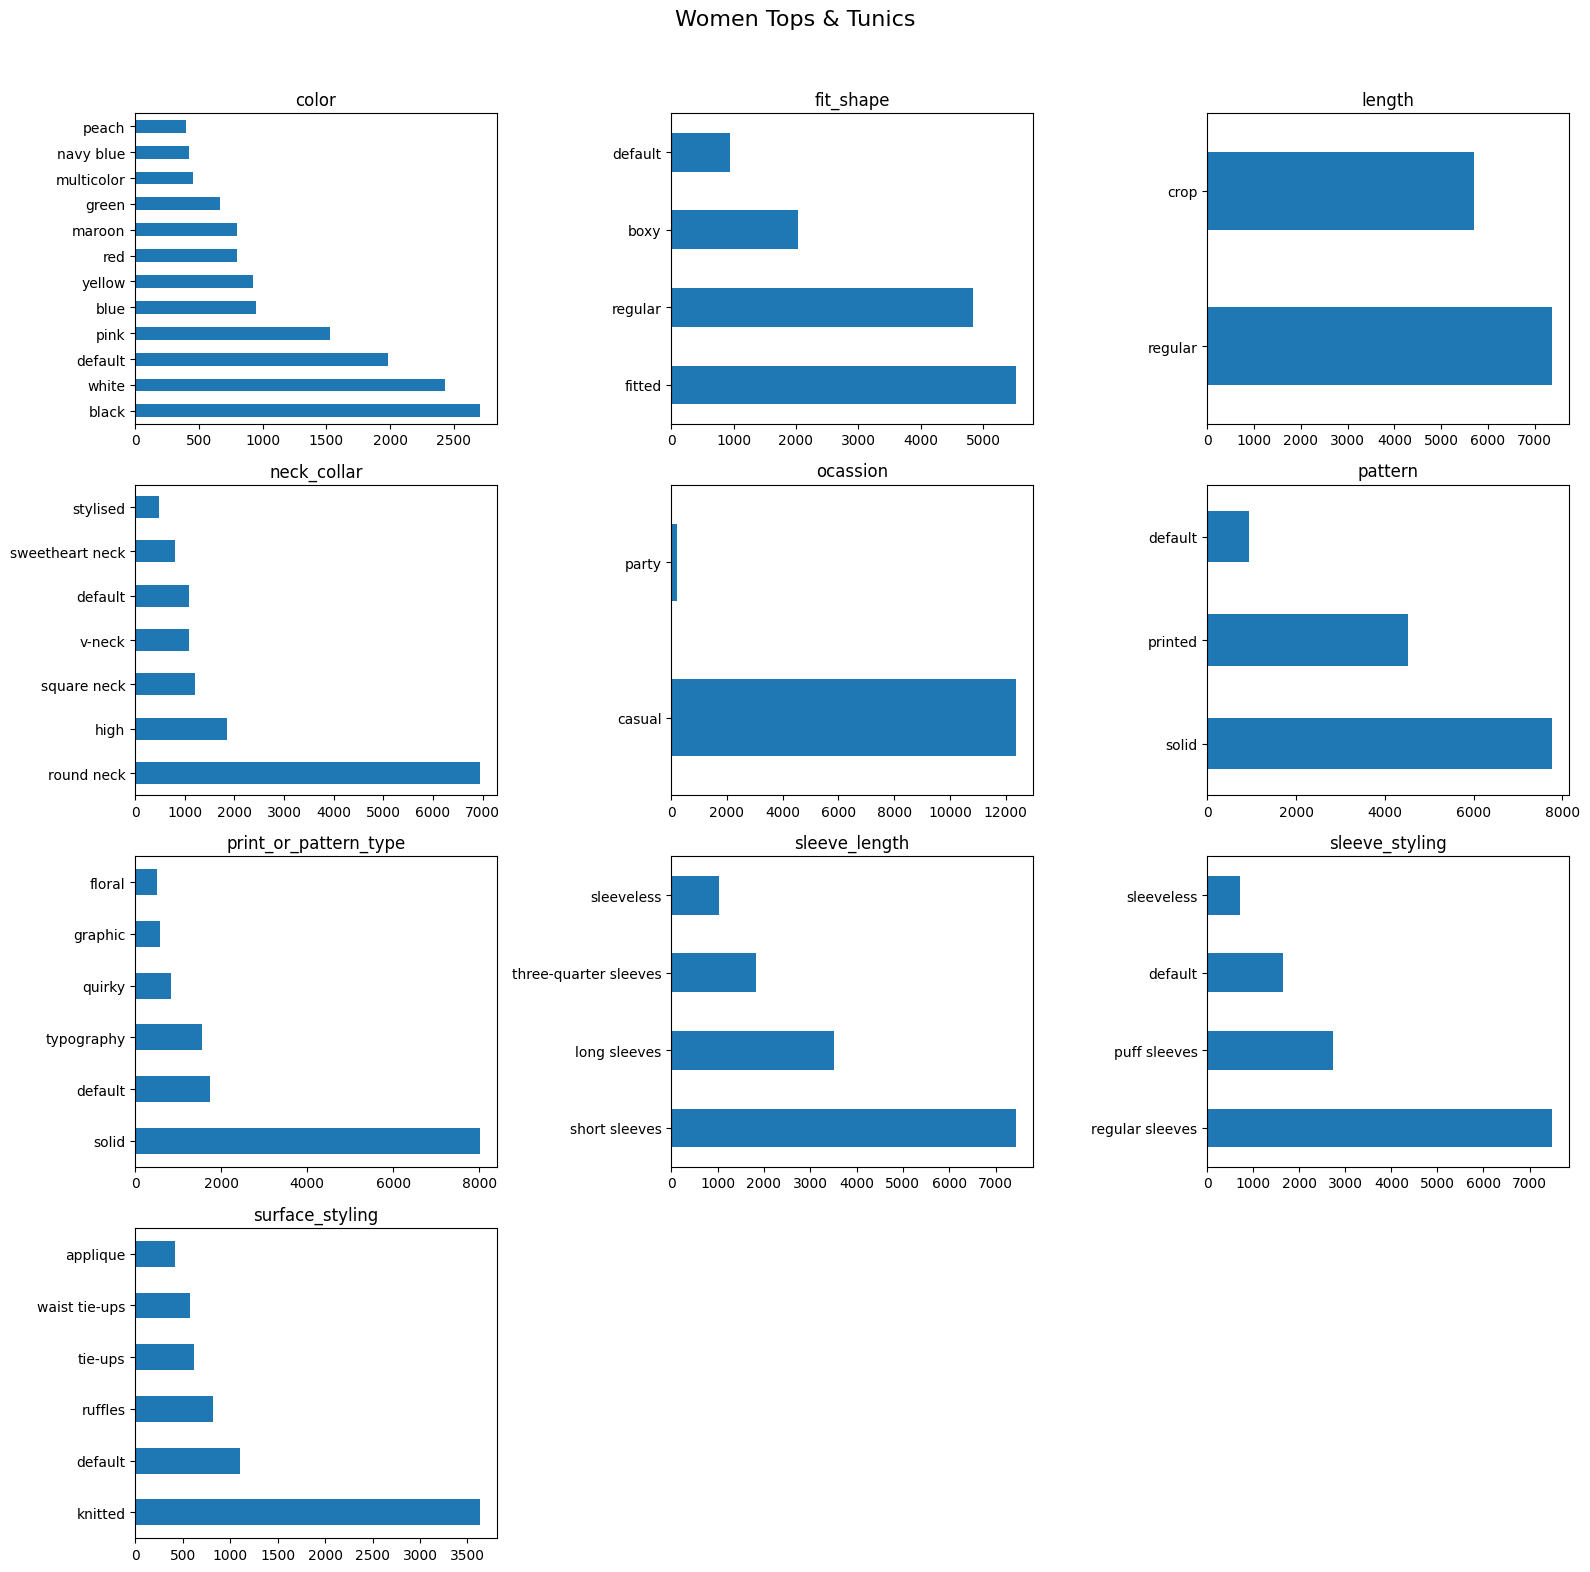

In [14]:
plot_counts('Women Tops & Tunics')

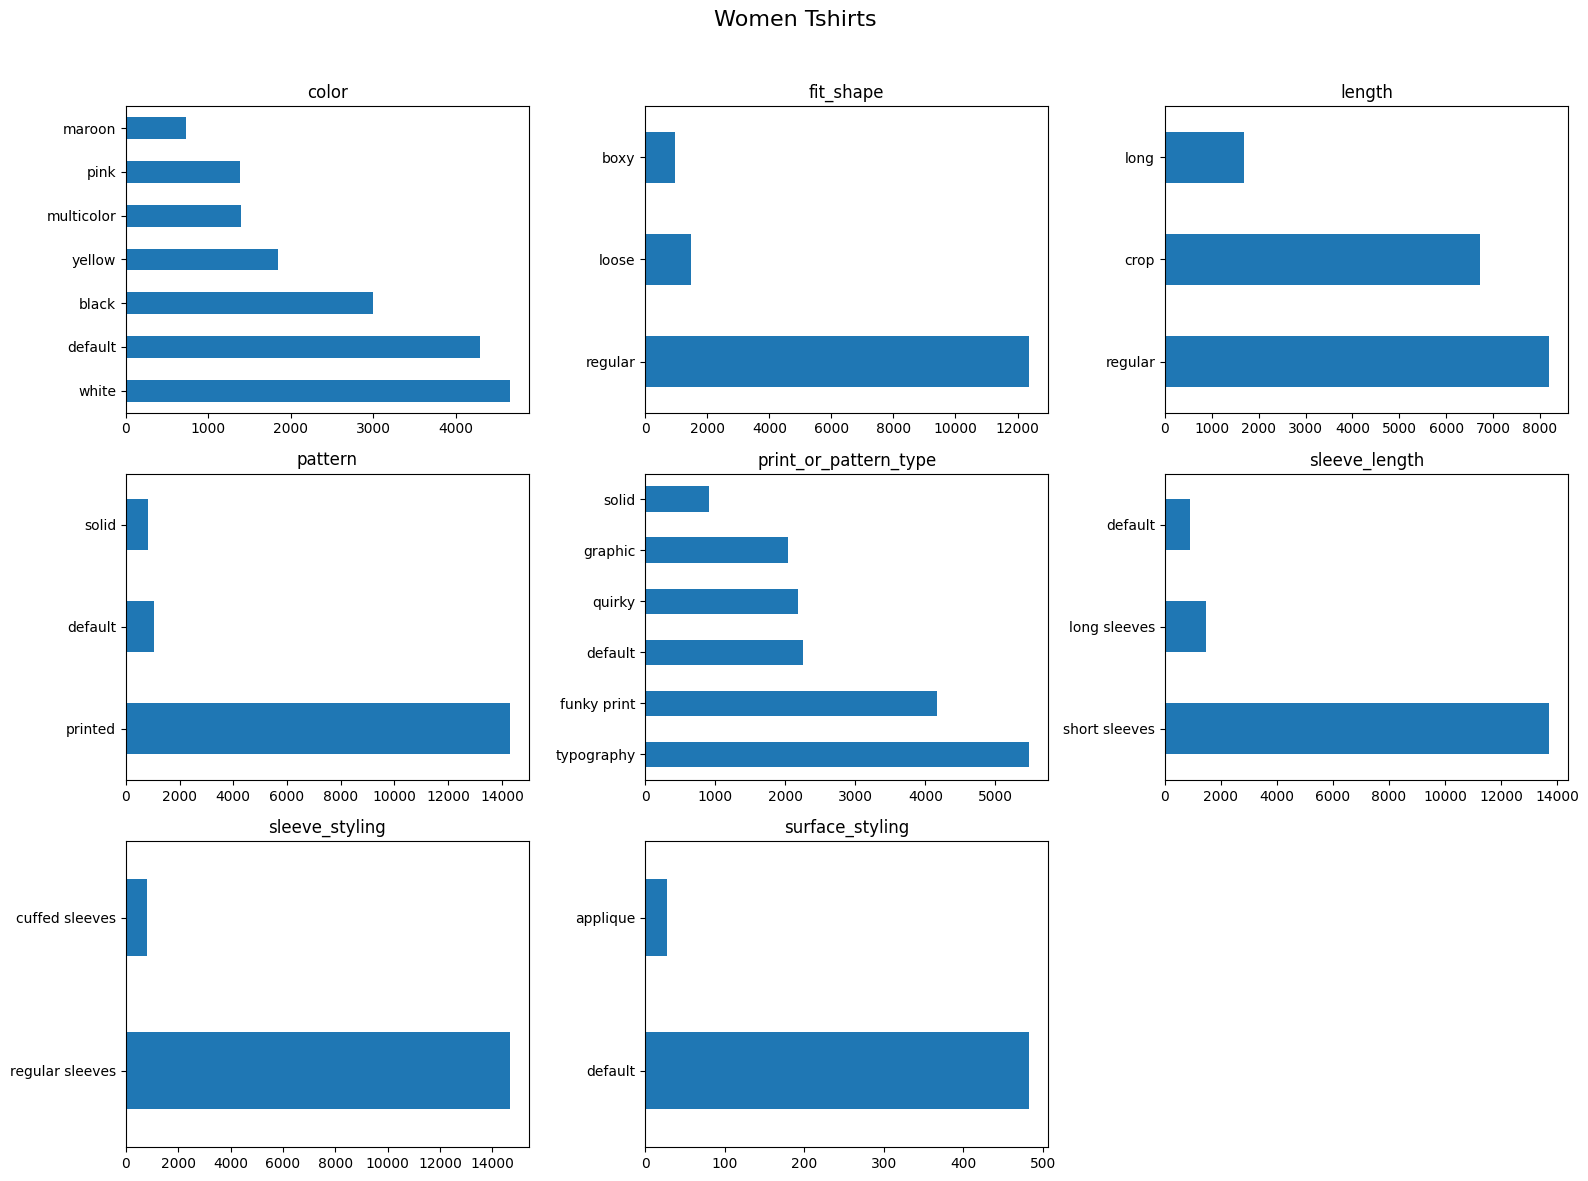

In [15]:
plot_counts('Women Tshirts')